# Trending_Youtube_Statistics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


### US Data

In [2]:
#import US data from the CSV
us_yt = pd.read_csv('data/USvideos.csv')
us_yt.drop(['video_id','trending_date','tags','thumbnail_link','video_error_or_removed','comments_disabled','ratings_disabled'],axis=1,inplace=True)
display(us_yt.info)
display(us_yt.head())

<bound method DataFrame.info of                                                    title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy M

,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,description
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,"One year after the presidential election, John..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,Today we find out if Link is a Nickelback amat...
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,I know it's been a while since we did this sho...


In [3]:
# correlations between numerical variables
#import seaborn as sns
#sns.pairplot(us_yt)

In [4]:
# finding the correlation matrix
us_yt.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307
views,-0.168231,1.000000,0.849177,0.472213,0.617621
likes,-0.173921,0.849177,1.000000,0.447186,0.803057
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000


Finding: Strong positive correlation with likes and views, strong positive correlation with likes and comments, while there is a moderate correlation between views and comments.

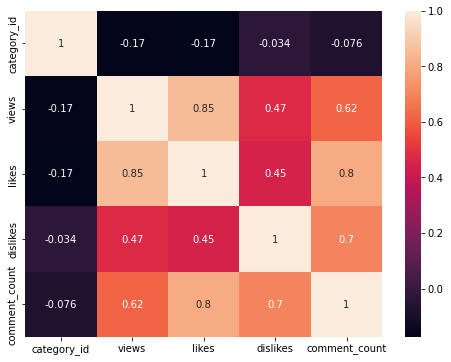

In [5]:
# Visualize the correlations, see the plots below
plt.figure(figsize=(8,6))
sns.heatmap(us_yt.corr(), annot=True);

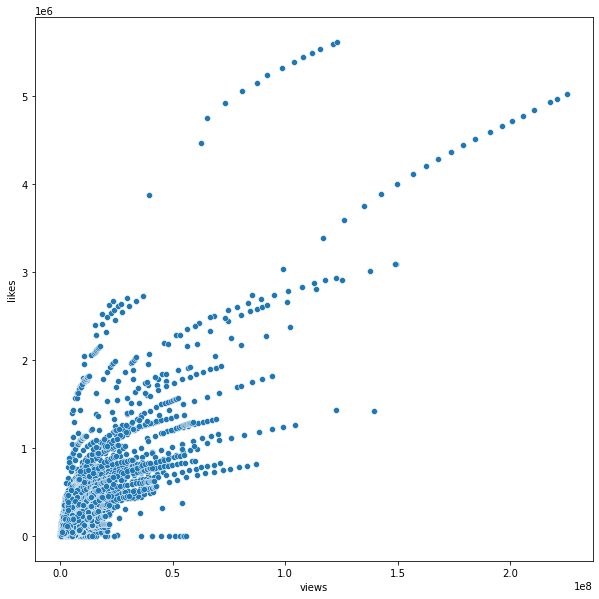

In [6]:
#scatterplot for likes/views
plt.figure(figsize=(10,10))
sns.scatterplot(x=us_yt['views'], y=us_yt['likes']);

### World Data

In [7]:
col_list = ['video_id', 'views', 'likes', 'dislikes', 'comment_count'] #only use these columns for analysis

us_yt = pd.read_csv('data/USvideos.csv', usecols=col_list) #United States
ca_yt = pd.read_csv('data/CAvideos.csv', usecols=col_list) #Canada
de_yt = pd.read_csv('data/DEvideos.csv', usecols=col_list) #Germany
fr_yt = pd.read_csv('data/FRvideos.csv', usecols=col_list) #France
gb_yt = pd.read_csv('data/GBvideos.csv', usecols=col_list) #United Kingdom (Great Brittain)
in_yt = pd.read_csv('data/INvideos.csv', usecols=col_list) #India
#jp_yt = pd.read_csv('data/JPvideos.csv', usecols=col_list) #Japan
#kr_yt = pd.read_csv('data/KRvideos.csv', usecols=col_list) #South Korea
#mx_yt = pd.read_csv('data/MXvideos.csv', usecols=col_list) #Mexico
#ru_yt = pd.read_csv('data/RUvideos.csv', usecols=col_list) #Russia

UnicodeDecodeError appears when reading Japan, Korea, Mexico, and Russia.
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 215323-215324: invalid continuation byte.
Might be the language problem?

In [8]:
#create correlation tables
wd_list = [us_yt, ca_yt, de_yt, fr_yt, gb_yt, in_yt,]
wd_name_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',]

for i in range(len(wd_list)):
    print(wd_name_list[i])
    current_wd = wd_list[i]
    corr_table = current_wd.corr()
    display(corr_table)   

United States


,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


Canada


,views,likes,dislikes,comment_count
views,1.000000,0.828964,0.557621,0.693107
likes,0.828964,1.000000,0.460427,0.836585
dislikes,0.557621,0.460427,1.000000,0.643494
comment_count,0.693107,0.836585,0.643494,1.000000


Germany


,views,likes,dislikes,comment_count
views,1.000000,0.824189,0.556000,0.705516
likes,0.824189,1.000000,0.460208,0.852492
dislikes,0.556000,0.460208,1.000000,0.642144
comment_count,0.705516,0.852492,0.642144,1.000000


France


,views,likes,dislikes,comment_count
views,1.000000,0.812569,0.586997,0.708161
likes,0.812569,1.000000,0.450548,0.849647
dislikes,0.586997,0.450548,1.000000,0.664893
comment_count,0.708161,0.849647,0.664893,1.000000


Great Brittain


,views,likes,dislikes,comment_count
views,1.000000,0.795862,0.392407,0.466899
likes,0.795862,1.000000,0.446746,0.744361
dislikes,0.392407,0.446746,1.000000,0.771772
comment_count,0.466899,0.744361,0.771772,1.000000


India


,views,likes,dislikes,comment_count
views,1.000000,0.850096,0.543294,0.674195
likes,0.850096,1.000000,0.494560,0.780514
dislikes,0.543294,0.494560,1.000000,0.708125
comment_count,0.674195,0.780514,0.708125,1.000000


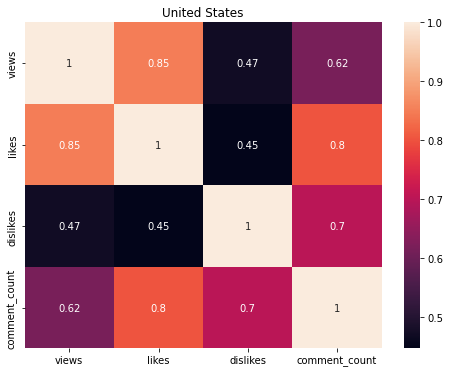

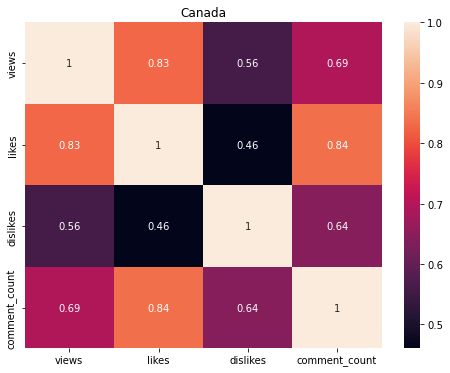

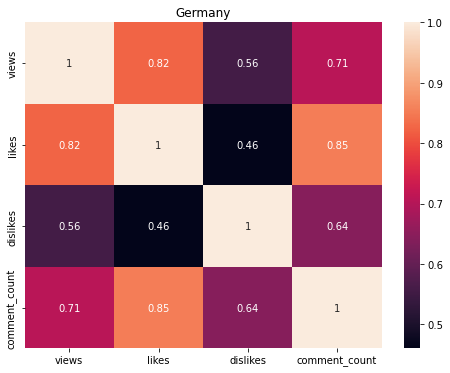

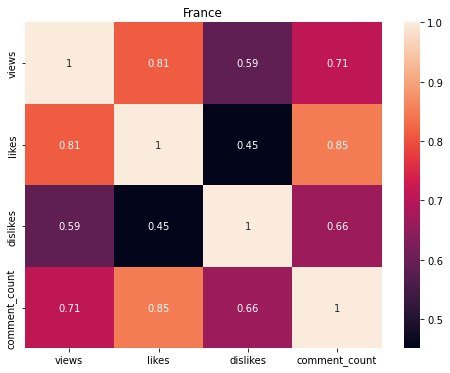

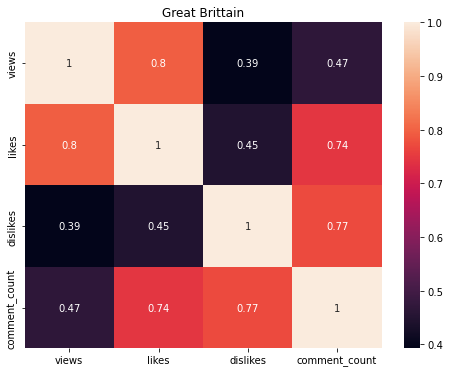

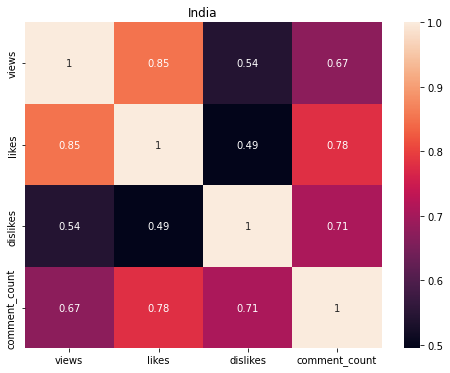

In [9]:
for i in range(len(wd_list)):
    current_wd = wd_list[i]
    corr_table = current_wd.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_table, annot=True)
    plt.title(str(wd_name_list[i]))